# Prepping the ADNI dataset
ADNI dataset can be found [here](https://www.kaggle.com/datasets/madhucharan/alzheimersdisease5classdatasetadni)

The dataset was downloaded from Kaggle with the images split into train and testing directories. The data consists of 4 disease state classes, which represent the disease progression, and a healthy congitive normal class. The images were originally downloaded from the [ADNI database](https://ida.loni.usc.edu/login.jsp?project=ADNI&page=HOME) and processed into a jpeg format to increase the speed of research. 

1296 images total

train data (1,101 images)
1. EMCI -> 204
2. LMCI -> 61
3. MCI -> 198
4. AD -> 145
5. CN -> 493 

test data (195 images)
1. EMCI -> 36
2. LMCI -> 11
3. MCI -> 35
4. AD -> 26
5. CN -> 87

In [2]:
import os
from PIL import Image
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
root_dir = '../'
data_dir = root_dir + 'data/ADNI/'
test_dir = data_dir + 'test/'
train_dir = data_dir + 'train/'

os.listdir(train_dir)



['AD', 'CN', 'LMCI', 'EMCI', 'MCI']

In [4]:
def count_files(dir):
    return len([1 for x in list(os.scandir(dir)) if x.is_file()])

classes = ['CN', 'AD', 'LMCI', 'EMCI', 'MCI']

print('Training data: ')
for c in classes:
    #dir = data_dir + c
    print('{}: {} images'.format(c, count_files(train_dir+c)))


Training data: 
CN: 493 images
AD: 145 images
LMCI: 61 images
EMCI: 204 images
MCI: 198 images


In [5]:
def load_images(dir, classes):
    imgs = []
    for c in classes:
        path = dir + str(c)
        temp = []
        for f in os.listdir(path):
            temp.append(os.path.join(path,f))
        imgs.append(temp)
    
    return dict(zip(classes, imgs))

img_dict = load_images(train_dir, classes)

img_dict.keys()

dict_keys(['CN', 'AD', 'LMCI', 'EMCI', 'MCI'])

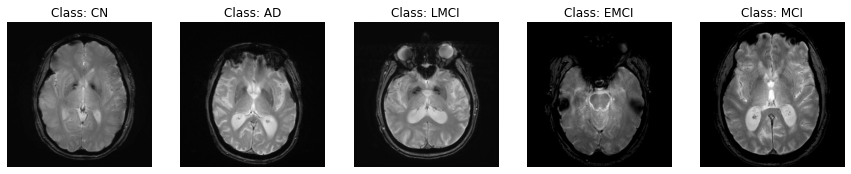

In [6]:
plt.figure(figsize=(15,30))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(plt.imread(img_dict[classes[i]][0]), cmap='gray')
    plt.title("Class: {}".format(classes[i]))
    plt.axis("off")